In [3]:
import cv2
from matplotlib import pyplot as plt
import sys
import math
import os

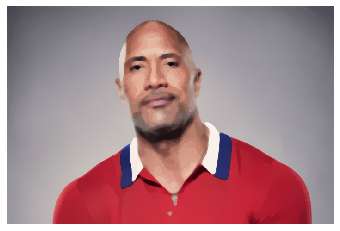

In [4]:
###Import Image###
#To test this with another image, simply save it to the apps directory at the same level of 'rock.jpg', and replace the 'rock.jpg' with new image name
absolute_path = os.path.join(os.getcwd(), 'rock.jpg');
original_img = cv2.imread(absolute_path, cv2.IMREAD_UNCHANGED)
#below step is to correct cv2 alterating the colours of original image
rgb_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

###Resize image###
#This step ensures that each image processed is around 1MB to ensure filtering is fairly consistent.
#This is done by calculating the size in bytes
bytesValue = sys.getsizeof(rgb_img.tobytes())
#Finding how much smaller/bigger this is compared to our desired 1MB
ratio = bytesValue / 1000000
scale_percent = 100 / ratio

#Find the ratio of length vs width (this will help find the new dimensions of the new 1MB image)
divide = rgb_img.shape[0] / rgb_img.shape[1]
#Get the total area (this will be used to find the area of the new 1MB image)
times = rgb_img.shape[0] * rgb_img.shape[1]
new_area = times * scale_percent / 100

#using algebra was able to get the dimensions
dim1 = int(math.sqrt(new_area / divide))
dim2 = int(new_area / dim1)
new_dimensions = (dim1, dim2)

#resize original image to the required dimensions to make it approximately 1MB
resized_img = cv2.resize(rgb_img, new_dimensions, interpolation = cv2.INTER_AREA)

###Edit image###
#median blur smooths out noise/smaller details
edited_image = cv2.medianBlur(resized_img, 9)

#bilateralFiltering is a process to blur an image, while being aware to not blur edges
#while loop is used to implement the same process several times with lower parameter values, this gave a less harsh output.
i = 0 
while i < 13:
    edited_image = cv2.bilateralFilter(edited_image, d=15, sigmaColor=6, sigmaSpace=75, borderType=cv2.BORDER_CONSTANT)
    i += 1  
plt.imshow(edited_image, interpolation='nearest')
plt.axis('off')

#below allows the run script to save to 'scriptOutput.jpg' 
plt.savefig('scriptOutput.jpg', bbox_inches='tight', dpi=1800)